# Lid driven Cavity (GPU)

**The following command is important to view matplotlib plots on a jupyter notebook**

In [1]:
# %matplotlib inline 

cf. http://stackoverflow.com/questions/33436221/displaying-rotatable-3d-plots-in-ipython-or-ipython-notebook

In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import os, sys

In [6]:
from matplotlib.mlab import griddata

In [7]:
import numpy as np

## Making a colorbar, making colormaps, Show colormaps, in matplotlib

cf. http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps  
i.e. [ SciPy CookbookMatplotlibShow_colormaps ](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps)

### making your own color bar

In [8]:
from pylab import *

In [9]:
cdict = {'red': ((0.0, 0.0, 0.0),
                (0.5, 1.0, 0.7),
                (1.0, 1.0, 1.0)), 
        'green': ((0.0, 0.0, 0.0), 
                 (0.5, 1.0, 0.0), 
                 (1.0, 1.0, 1.0)), 
        'blue': ((0.0, 0.0, 0.0),
                (0.5, 1.0, 0.0),
                (1.0, 0.5, 1.0))}

In [10]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

<IPython.core.display.Javascript object>


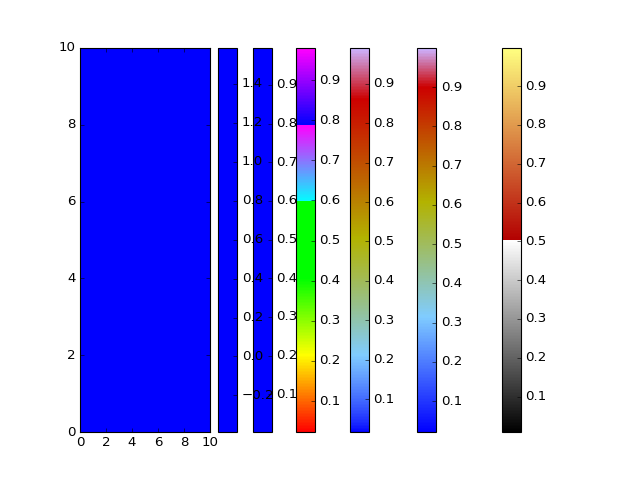

In [11]:
pcolor(rand(10,10),cmap=my_cmap)
colorbar()

where `rand(10,10)` is a 10x10 array of random numbers in the range $[0.0, 1.0)$

In [12]:
rand(10,10)

array([[  6.86040949e-01,   9.40534792e-01,   4.07140143e-01,
          7.24149635e-01,   8.58142152e-01,   2.15366347e-01,
          1.62501280e-01,   2.79871073e-02,   5.70201696e-01,
          5.16922643e-01],
       [  3.28618105e-01,   8.23557984e-01,   1.38426477e-01,
          4.12206837e-01,   7.66773809e-01,   8.10581687e-01,
          7.70794962e-01,   6.81793841e-01,   7.10979123e-01,
          9.85421819e-01],
       [  5.78253553e-01,   6.85361073e-01,   8.50571299e-01,
          5.83388511e-02,   9.31269290e-01,   2.18212096e-01,
          8.41934963e-01,   2.52056282e-01,   1.69788014e-02,
          7.40342657e-01],
       [  7.60113363e-01,   1.42457676e-01,   1.84276674e-01,
          2.47925556e-02,   9.74570329e-01,   9.97785816e-01,
          3.75570544e-02,   7.70097701e-01,   1.89902085e-01,
          9.92733616e-01],
       [  3.74047453e-01,   2.05289745e-01,   4.09023361e-01,
          3.59591353e-01,   9.50900180e-01,   8.84992111e-01,
          7.44247438e-01

In [13]:
cdict2 = {'red': ((0.0, 0.0, 0.0), 
                    (0.3, 0.5, 0.5),
                     (0.6, 0.7, 0.7),
                     (0.9, 0.8, 0.8),
                     (1.0, 0.8, 0.8)), 
        'green': ((0.0, 0.0, 0.0), 
                (0.3, 0.8, 0.8),
                (0.6, 0.7, 0.7),
                 (0.9, 0.0, 0.0),
                 (1.0, 0.7, 0.7)),
         'blue': ((0.0, 1.0, 1.0),
                 (0.3, 1.0, 1.0),
                 (0.6, 0.0, 0.0),
                 (0.9, 0.0, 0.0),
                 (1.0, 1.0, 1.0))}


In [14]:
cmap1 = matplotlib.colors.LinearSegmentedColormap('my_colormap2', cdict2, N=256 )

In [15]:
cmap2 = matplotlib.colors.LinearSegmentedColormap('my_colormap2', cdict2, N=256, gamma=0.75 )

In [16]:
pcolor(rand(10,10),cmap=cmap1 )
colorbar()

In [17]:
pcolor(rand(10,10),cmap=cmap2 )
colorbar()

In [39]:
cdict3 = {'red': ((0.0, 1.0, 1.0),
                 (0.2,1.0, 1.0 ),
                 (0.4,0.0,0.0),
                 (0.6,0.0,0.0),
                 (0.8,0.0,0.0),
                 (1.0,1.0,1.0)), 
         'green': ((0.0,0.0,0.0),
                  (0.2,1.0,1.0),
                  (0.4,1.0,1.0),
                  (0.6,1.0,1.0),
                  (0.8,0.0, 0.0),
                  (1.0,0.0,0.0)),
         'blue': ((0.0,0.0,0.0),
                 (0.2,0.0,0.0),
                 (0.4,0.0,0.0),
                 (0.6,1.0,1.0),
                 (0.8,1.0,1.0),
                 (1.0,1.0,1.0))}

In [35]:
cmap3 = matplotlib.colors.LinearSegmentedColormap('my_colormap3', cdict3, N=256)

In [36]:
pcolor(rand(10,10),cmap=cmap3)
colorbar()

In [22]:
minval = -0.4
maxval = 1.6
rangeval = maxval - minval

In [26]:
rangeval*0.2

0.4

In [27]:
"""
cdict3b = {'red': ((minval + rangeval*0.2*0, 1.0, 1.0),
                 (minval + rangeval*0.2*1,1.0, 1.0 ),
                 (minval + rangeval*0.2*2,0.0,0.0),
                 (minval + rangeval*0.2*3,0.0,0.0),
                 (minval + rangeval*0.2*4,1.0,0.0),
                 (minval + rangeval*0.2*5,1.0,1.0)), 
         'green': ((minval + rangeval*0.2*0,0.0,0.0),
                  (minval + rangeval*0.2*1,1.0,1.0),
                  (minval + rangeval*0.2*2,1.0,1.0),
                  (minval + rangeval*0.2*3,1.0,1.0),
                  (minval + rangeval*0.2*4,0.0, 0.0),
                  (minval + rangeval*0.2*5,0.0,0.0)),
         'blue': ((minval + rangeval*0.2*0,0.0,0.0),
                 (minval + rangeval*0.2*1,0.0,0.0),
                 (minval + rangeval*0.2*2,0.0,0.0),
                 (minval + rangeval*0.2*3,0.0,1.0),
                 (minval + rangeval*0.2*4,1.0,1.0),
                 (minval + rangeval*0.2*5,1.0,1.0))}
                 """


In [28]:
cdict3b

{'blue': ((-0.4, 0.0, 0.0),
  (0.0, 0.0, 0.0),
  (0.4, 0.0, 0.0),
  (0.8000000000000002, 0.0, 1.0),
  (1.2000000000000002, 1.0, 1.0),
  (1.6, 1.0, 1.0)),
 'green': ((-0.4, 0.0, 0.0),
  (0.0, 1.0, 1.0),
  (0.4, 1.0, 1.0),
  (0.8000000000000002, 1.0, 1.0),
  (1.2000000000000002, 0.0, 0.0),
  (1.6, 0.0, 0.0)),
 'red': ((-0.4, 1.0, 1.0),
  (0.0, 1.0, 1.0),
  (0.4, 0.0, 0.0),
  (0.8000000000000002, 0.0, 0.0),
  (1.2000000000000002, 1.0, 0.0),
  (1.6, 1.0, 1.0))}

In [40]:
cmap3b = matplotlib.colors.LinearSegmentedColormap('my_colormap3b', cdict3, N=256)

<IPython.core.display.Javascript object>


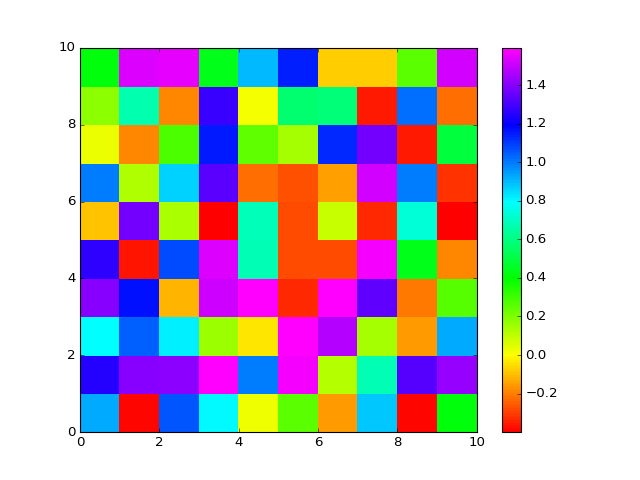

In [41]:
pcolor( np.random.uniform(minval, maxval, size=(10,10)),cmap=cmap3b)
colorbar()

* So this would be the color bar or color map relating color to the magnitude of the $x$-component of th